<a href="https://colab.research.google.com/github/RPAlbuquerque/Data-Science-UFRGS/blob/main/Tramontina_Salvador_Oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PASSO 1 - Importando os Dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1.1: Importando os dados de Mobilidade (Logan)

In [2]:
import pandas as pd

# File upload
caminho_arquivo = '/content/drive/MyDrive/Data - ML/export-20231001-20231123.csv'

# Read in CSV format
df = pd.read_csv('/content/drive/MyDrive/Data - ML/export-20231001-20231123.csv')

print(df)

                      month_part  store_id demographics_gender  \
0       2023-10-01T00:00:00.000Z  kml_2244                   F   
1       2023-10-01T00:00:00.000Z  kml_4311                   M   
2       2023-10-01T00:00:00.000Z   kml_236                   M   
3       2023-10-01T00:00:00.000Z   kml_143                   M   
4       2023-10-01T00:00:00.000Z    kml_33                   F   
...                          ...       ...                 ...   
364155  2023-10-01T00:00:00.000Z  kml_1335                   M   
364156  2023-10-01T00:00:00.000Z  kml_1335                   M   
364157  2023-10-01T00:00:00.000Z  kml_2508                   F   
364158  2023-10-01T00:00:00.000Z  kml_2508                   F   
364159  2023-10-01T00:00:00.000Z  kml_4221                   M   

       demographics_age_range demographics_class       unique       visits  \
0                       50_59                  D   391.766211  1872.677893   
1                       25_29                  E   

In [3]:
print(df.columns)

Index(['month_part', 'store_id', 'demographics_gender',
       'demographics_age_range', 'demographics_class', 'unique', 'visits',
       'raw_unique', 'raw_visits', 'unique_q1', 'visits_q1', 'unique_q2',
       'visits_q2', 'unique_q3', 'visits_q3', 'unique_q4', 'visits_q4',
       'repeat_q1', 'repeat_q2', 'repeat_q3', 'repeat_q4', 'repeat_visitors',
       'new_visitor_q1', 'new_visitor_q2', 'new_visitor_q3', 'new_visitor_q4',
       'new_visitors', 'dwell_time_mins_q1', 'dwell_time_mins_q2',
       'dwell_time_mins_q3', 'dwell_time_mins_q4', 'dwell_time_mins',
       'dow_1_h1', 'dow_1_h2', 'dow_1_h3', 'dow_1_h4', 'dow_2_h1', 'dow_2_h2',
       'dow_2_h3', 'dow_2_h4', 'dow_3_h1', 'dow_3_h2', 'dow_3_h3', 'dow_3_h4',
       'dow_4_h1', 'dow_4_h2', 'dow_4_h3', 'dow_4_h4', 'dow_5_h1', 'dow_5_h2',
       'dow_5_h3', 'dow_5_h4', 'dow_6_h1', 'dow_6_h2', 'dow_6_h3', 'dow_6_h4',
       'dow_7_h1', 'dow_7_h2', 'dow_7_h3', 'dow_7_h4'],
      dtype='object')


##1.2: Importanto os Shapes (GeoJson Data)

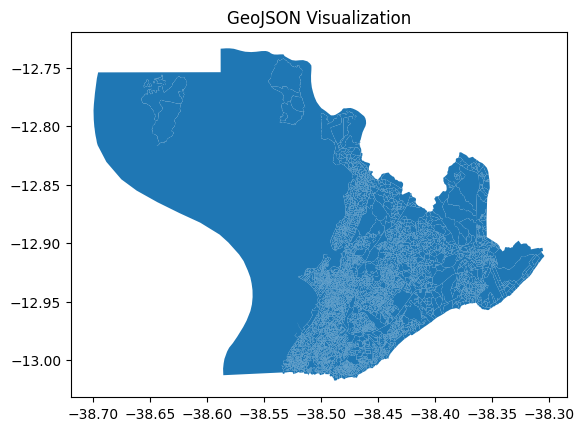

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON file using GeoPandas
geojson_file = '/content/drive/MyDrive/Data - ML/2927408_salvador_setores_2021.geojson'
gdf = gpd.read_file(geojson_file)

# Plot the GeoDataFrame
gdf.plot()

# Add a title to the plot
plt.title('GeoJSON Visualization')

# Show the plot
plt.show()

In [5]:
print(gdf.columns)

Index(['id', 'name', 'visibility', 'description', 'extrude', 'tessellate',
       'geometry'],
      dtype='object')


##1.3: Importanto os dados de Vendas de Salvador (Tramontina)

In [6]:
import pandas as pd

# Ler o arquivo CSV e atribuir a um DataFrame chamado 'tdf'
tdf = pd.read_csv('/content/drive/MyDrive/Data - ML/tramontina_salvador_out_2023.csv')

# Exibir as primeiras linhas do DataFrame
print(tdf.head())


  #;Data EmissÃ£o Nota Fiscal;CÃ³digo Produto;DescriÃ§Ã£o Produto;Qtde PeÃ§as;Valor Total Produtos;% Desconto;CEP Cliente;Nome Cidade;UF Cliente;ClassificaÃ§Ã£o Cliente
0  370907;02/10/2023;57400094;Adaptador 2p Univer...                                                                                                                    
1  371918;03/10/2023;57115056;Tomada Rj 45 (Cat 6...                                                                                                                    
2  371919;03/10/2023;57217056;Tomada Rj 45 (Cat 6...                                                                                                                    
3  371920;03/10/2023;57241013;Cj Tomada 2p+T 20a/...                                                                                                                    
4  371921;03/10/2023;58011108;Minidisjuntor Tdj3-...                                                                                                       

In [7]:
# Dividindo a coluna única em múltiplas colunas usando o ponto e vírgula como separador
tdf = tdf['#;Data EmissÃ£o Nota Fiscal;CÃ³digo Produto;DescriÃ§Ã£o Produto;Qtde PeÃ§as;Valor Total Produtos;% Desconto;CEP Cliente;Nome Cidade;UF Cliente;ClassificaÃ§Ã£o Cliente'].str.split(';', expand=True)

# Renomeando as colunas
tdf.columns = ['#', 'Data Emissão Nota Fiscal', 'Código Produto', 'Descrição Produto', 'Qtde Peças', 'Valor Total Produtos', '% Desconto', 'CEP Cliente', 'Nome Cidade', 'UF Cliente', 'Classificação Cliente']

# Visualizando as primeiras linhas do dataframe após a separação
print(tdf.head())

        # Data Emissão Nota Fiscal Código Produto  \
0  370907               02/10/2023       57400094   
1  371918               03/10/2023       57115056   
2  371919               03/10/2023       57217056   
3  371920               03/10/2023       57241013   
4  371921               03/10/2023       58011108   

                     Descrição Produto Qtde Peças Valor Total Produtos  \
0  Adaptador 2p Univer.10a/250v Branco          1            1.642.003   
1          Tomada Rj 45 (Cat 6) Branca         10                94.94   
2            Tomada Rj 45 (Cat 6) Aria         20               177.84   
3  Cj Tomada 2p+T 20a/250v Aria Branco         40               182.74   
4   Minidisjuntor Tdj3-1c32 1p 32a 3ka         24               138.84   

  % Desconto CEP Cliente Nome Cidade UF Cliente Classificação Cliente  
0        0.0    41830390    Salvador         BA         Pessoa Fisica  
1        0.0    41615000    Salvador         BA                Varejo  
2        0.0    4161

In [8]:
print(tdf.columns)

Index(['#', 'Data Emissão Nota Fiscal', 'Código Produto', 'Descrição Produto',
       'Qtde Peças', 'Valor Total Produtos', '% Desconto', 'CEP Cliente',
       'Nome Cidade', 'UF Cliente', 'Classificação Cliente'],
      dtype='object')


#PASSO 2: Ajustes dos Dados

##2.1: Geospatial Analysis:

<ipython-input-9-28eff68363f4>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_geo = gpd.GeoDataFrame(gdf, geometry=gdf.centroid)


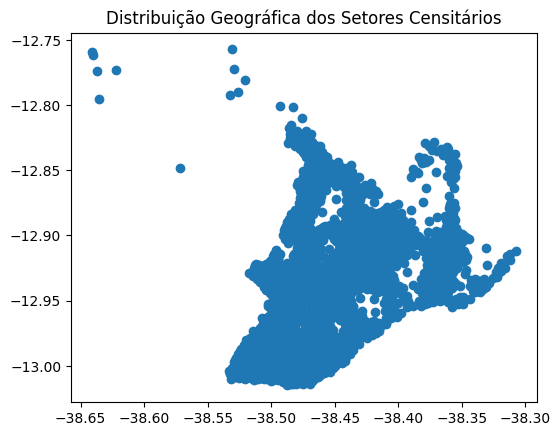

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Crie um GeoDataFrame a partir do DataFrame 'gdf'
gdf_geo = gpd.GeoDataFrame(gdf, geometry=gdf.centroid)

# Plote o mapa
gdf_geo.plot()
plt.title('Distribuição Geográfica dos Setores Censitários')
plt.show()


<ipython-input-10-9d460f77f329>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlOrRd')
<ipython-input-10-9d460f77f329>:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label=f'{metric_of_interest}', orientation='vertical', pad=0.01)


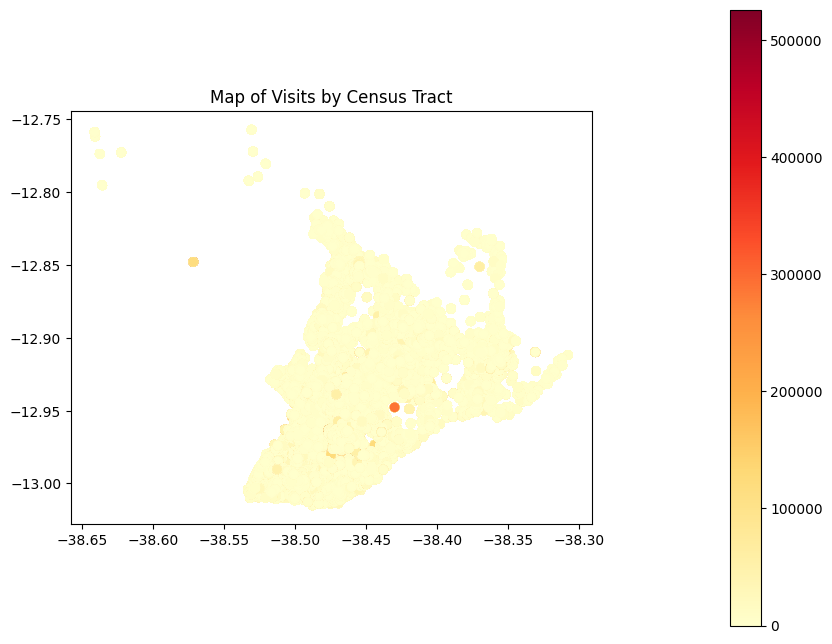

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

# Combine os dataframes 'gdf' e 'df' usando a coluna comum 'id'
merged_data = gpd.GeoDataFrame(pd.merge(gdf, df, how='inner', left_on='id', right_on='store_id'), geometry='geometry')

# Escolha uma métrica de interesse (por exemplo, número de visitas)
metric_of_interest = 'visits'

# Normalização da escala de cores
norm = Normalize(vmin=merged_data[metric_of_interest].min(), vmax=merged_data[metric_of_interest].max())

# Escolha da paleta de cores (vermelho para amarelo)
cmap = cm.get_cmap('YlOrRd')

# Plote o mapa com base na métrica de interesse e as cores personalizadas
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_data.plot(column=metric_of_interest, legend=True, ax=ax, cmap=cmap, norm=norm)

# Adicione uma barra de cores personalizada
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Ajuste da localização da barra de cores
cbar = plt.colorbar(sm, label=f'{metric_of_interest}', orientation='vertical', pad=0.01)

# Remova a segunda barra de cores que pode ter sido gerada automaticamente
cbar.remove()

plt.title(f'Map of {metric_of_interest.capitalize()} by Census Tract')
plt.show()


##2.2: Análise dos dados e Missings

In [11]:
# Verificação dos tipos de dados das colunas
print("Tipos de dados do dataframe 'df':")
print(df.dtypes)

print("\nTipos de dados do dataframe 'gdf':")
print(gdf.dtypes)

print("\nTipos de dados do dataframe 'tdf':")
print(tdf.dtypes)

Tipos de dados do dataframe 'df':
month_part                 object
store_id                   object
demographics_gender        object
demographics_age_range     object
demographics_class         object
unique                    float64
visits                    float64
raw_unique                float64
raw_visits                float64
unique_q1                 float64
visits_q1                 float64
unique_q2                 float64
visits_q2                 float64
unique_q3                 float64
visits_q3                 float64
unique_q4                 float64
visits_q4                 float64
repeat_q1                 float64
repeat_q2                 float64
repeat_q3                 float64
repeat_q4                 float64
repeat_visitors           float64
new_visitor_q1            float64
new_visitor_q2            float64
new_visitor_q3            float64
new_visitor_q4            float64
new_visitors              float64
dwell_time_mins_q1        float64
dwell_time_min

In [12]:
# Estatísticas descritivas básicas para colunas numéricas
print("Estatísticas descritivas básicas para o dataframe 'df':")
print(df.describe())

print("\nEstatísticas descritivas básicas para o dataframe 'tdf':")
print(tdf.describe())

Estatísticas descritivas básicas para o dataframe 'df':
              unique         visits     raw_unique     raw_visits  \
count  364160.000000  364160.000000  364160.000000  364160.000000   
mean      789.885284    3672.723828      93.365994     167.309948   
std      1962.216049    8815.513214     234.075733     409.583323   
min         0.000000       0.000000       0.000000       0.000000   
25%        79.680042     413.212768       8.968341      17.909122   
50%       267.748705    1367.253169      30.447623      59.733212   
75%       803.056483    3985.464182      92.412051     176.195088   
max    108923.458883  526240.315224   12651.924773   23651.338759   

           unique_q1      visits_q1      unique_q2      visits_q2  \
count  364160.000000  364160.000000  364160.000000  364160.000000   
mean      201.725297     808.035333     250.624653     898.515282   
std       526.463877    2050.457438     632.593546    2159.935456   
min         0.000000       0.000000       0.00

In [13]:
# Identificação de valores ausentes
print("Valores ausentes no dataframe 'df':")
print(df.isnull().sum())

print("\nValores ausentes no dataframe 'gdf':")
print(gdf.isnull().sum())

print("\nValores ausentes no dataframe 'tdf':")
print(tdf.isnull().sum())


Valores ausentes no dataframe 'df':
month_part                0
store_id                  0
demographics_gender       0
demographics_age_range    0
demographics_class        0
unique                    0
visits                    0
raw_unique                0
raw_visits                0
unique_q1                 0
visits_q1                 0
unique_q2                 0
visits_q2                 0
unique_q3                 0
visits_q3                 0
unique_q4                 0
visits_q4                 0
repeat_q1                 0
repeat_q2                 0
repeat_q3                 0
repeat_q4                 0
repeat_visitors           0
new_visitor_q1            0
new_visitor_q2            0
new_visitor_q3            0
new_visitor_q4            0
new_visitors              0
dwell_time_mins_q1        0
dwell_time_mins_q2        0
dwell_time_mins_q3        0
dwell_time_mins_q4        0
dwell_time_mins           0
dow_1_h1                  0
dow_1_h2                  0
dow_1_h3    

##2.3: Merge dos dados de geolocalização ('store_id' e o polígono do GeoJson)

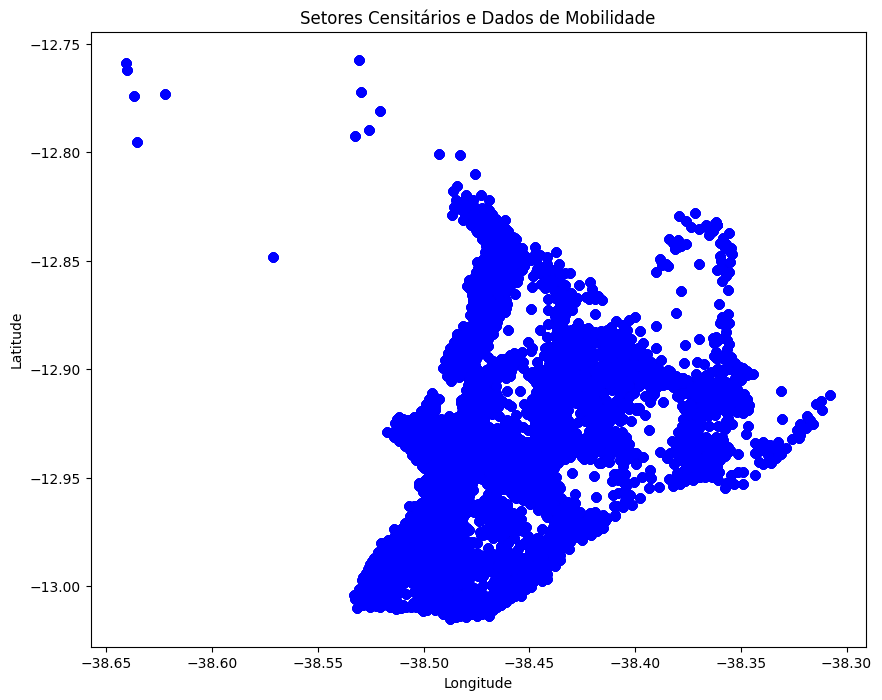

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Juntar os DataFrames df e gdf com base na variável 'store_id'
merged_data = gdf.merge(df, left_on='id', right_on='store_id', how='inner')

# 2. Visualização no mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar os polígonos dos setores censitários
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Destacar os setores censitários associados aos dados de mobilidade
merged_data.plot(ax=ax, color='blue')

plt.title('Setores Censitários e Dados de Mobilidade')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#PASSO 3: Análise Exploratória

##3.1: Análise exploratória dados de mobilidade

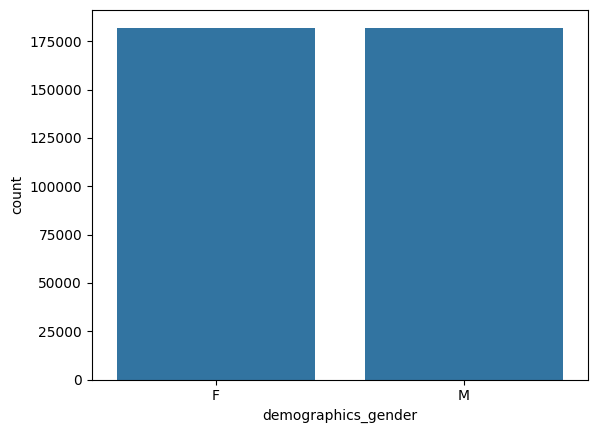

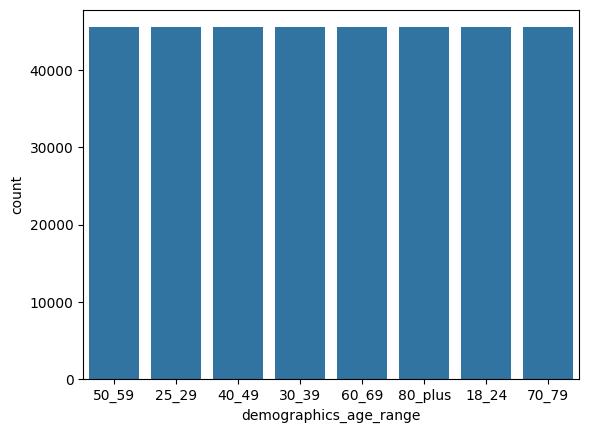

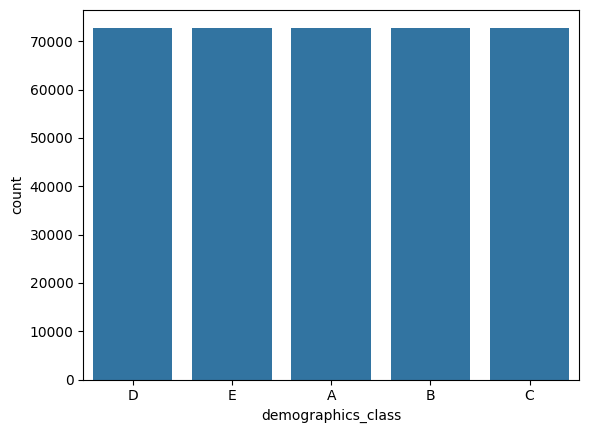

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#Gender distribution
sns.countplot(x='demographics_gender', data=df)
plt.show()

#Age Range Distribution
sns.countplot(x='demographics_age_range', data=df)
plt.show()

#Demographic Class Distribution
sns.countplot(x='demographics_class', data=df)
plt.show()

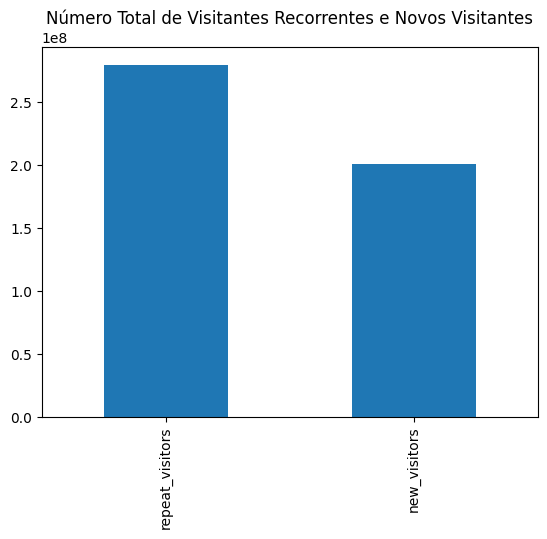

In [16]:
#Bar Chart for Repeat and New Visitors
df[['repeat_visitors', 'new_visitors']].sum().plot(kind='bar')
plt.title('Número Total de Visitantes Recorrentes e Novos Visitantes')
plt.show()

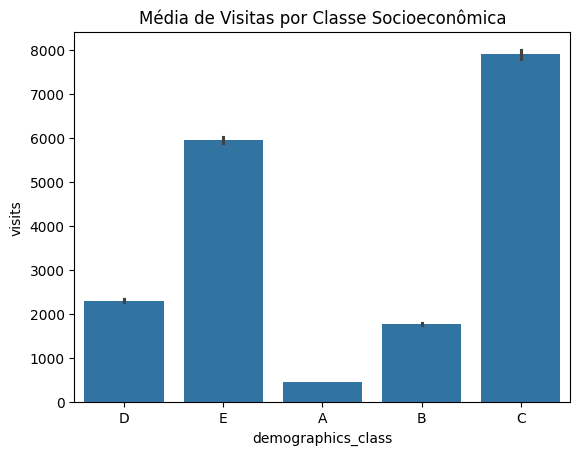

In [17]:
sns.barplot(x='demographics_class', y='visits', data=df)
plt.title('Média de Visitas por Classe Socioeconômica')
plt.show()

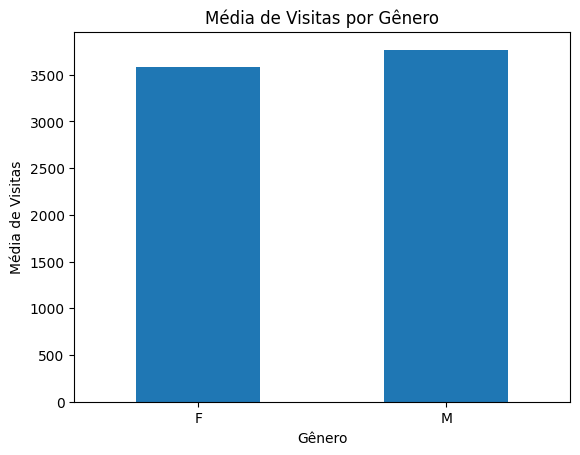

In [18]:
import matplotlib.pyplot as plt

# Calcular a média de visitas por gênero
mean_visits_by_gender = df.groupby('demographics_gender')['visits'].mean()

# Plotar o gráfico de barras
mean_visits_by_gender.plot(kind='bar', rot=0)
plt.title('Média de Visitas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Visitas')
plt.show()

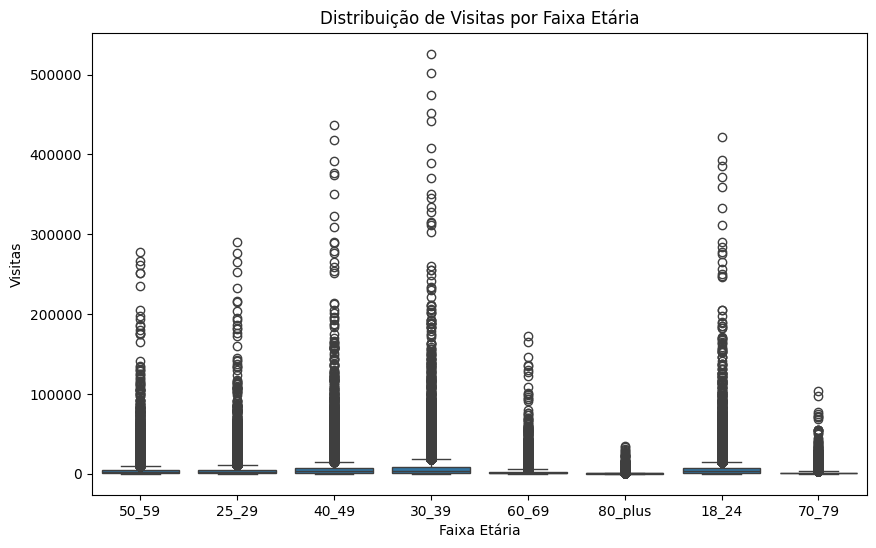

In [19]:
# Plotar o boxplot das visitas por faixa etária
plt.figure(figsize=(10, 6))
sns.boxplot(x='demographics_age_range', y='visits', data=df)
plt.title('Distribuição de Visitas por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Visitas')
plt.show()

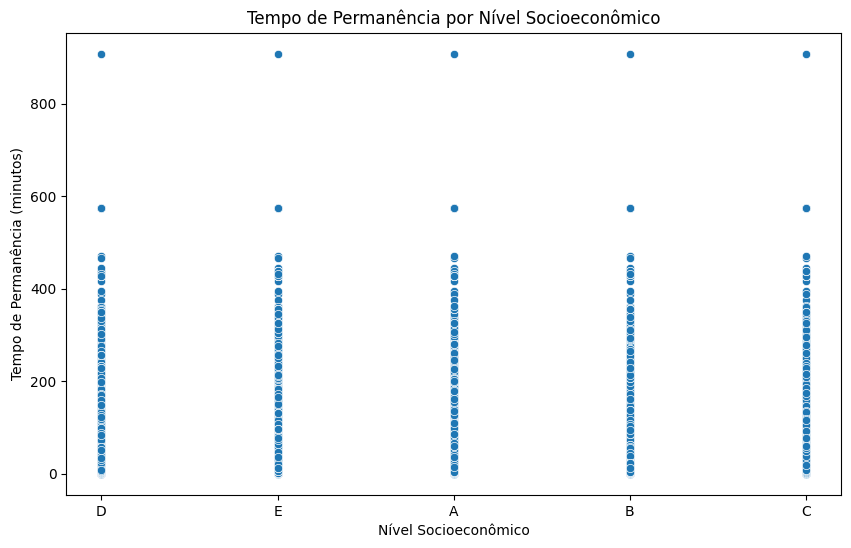

In [20]:
# Plotar o gráfico de dispersão do tempo de permanência em relação ao nível socioeconômico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='demographics_class', y='dwell_time_mins', data=df)
plt.title('Tempo de Permanência por Nível Socioeconômico')
plt.xlabel('Nível Socioeconômico')
plt.ylabel('Tempo de Permanência (minutos)')
plt.show()

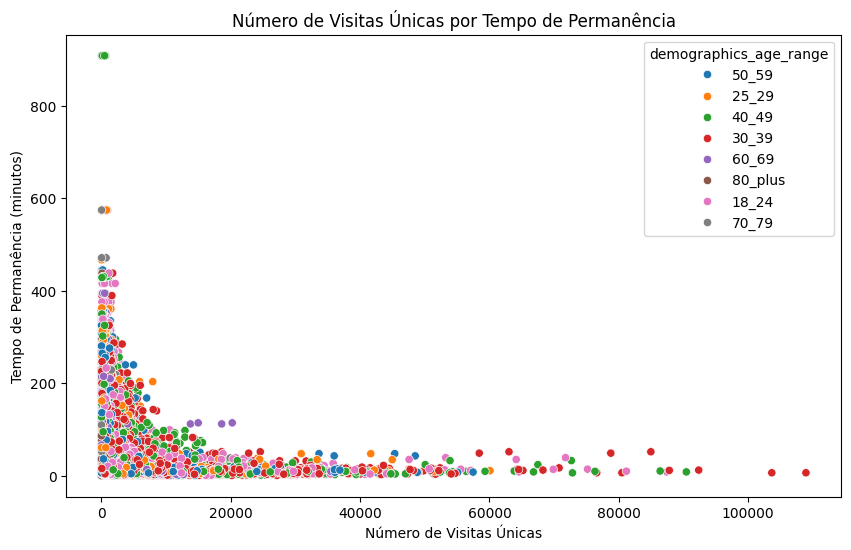

In [21]:
# Plotar o gráfico de dispersão do número de visitas únicas em relação ao tempo de permanência, colorido por faixa etária
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unique', y='dwell_time_mins', hue='demographics_age_range', data=df)
plt.title('Número de Visitas Únicas por Tempo de Permanência')
plt.xlabel('Número de Visitas Únicas')
plt.ylabel('Tempo de Permanência (minutos)')
plt.show()

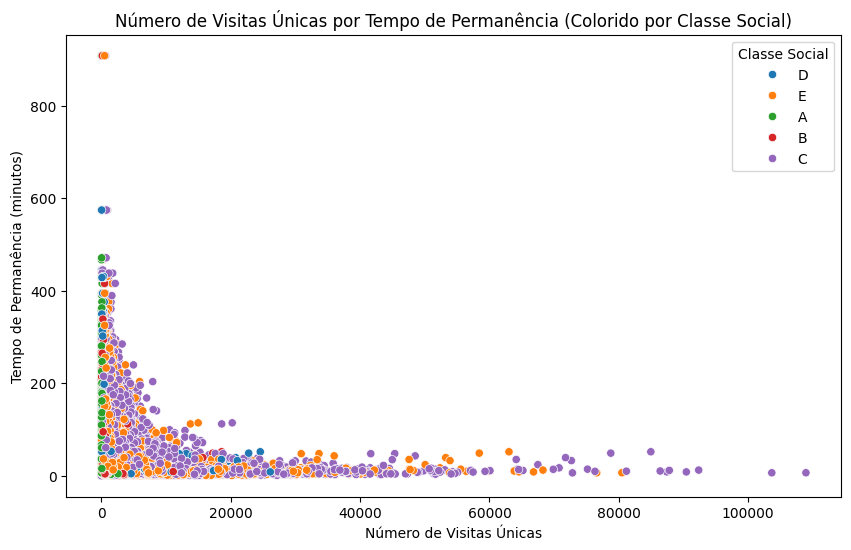

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar o gráfico de dispersão do número de visitas únicas em relação ao tempo de permanência, colorido por classe social
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unique', y='dwell_time_mins', hue='demographics_class', data=df)
plt.title('Número de Visitas Únicas por Tempo de Permanência (Colorido por Classe Social)')
plt.xlabel('Número de Visitas Únicas')
plt.ylabel('Tempo de Permanência (minutos)')
plt.legend(title='Classe Social')
plt.show()

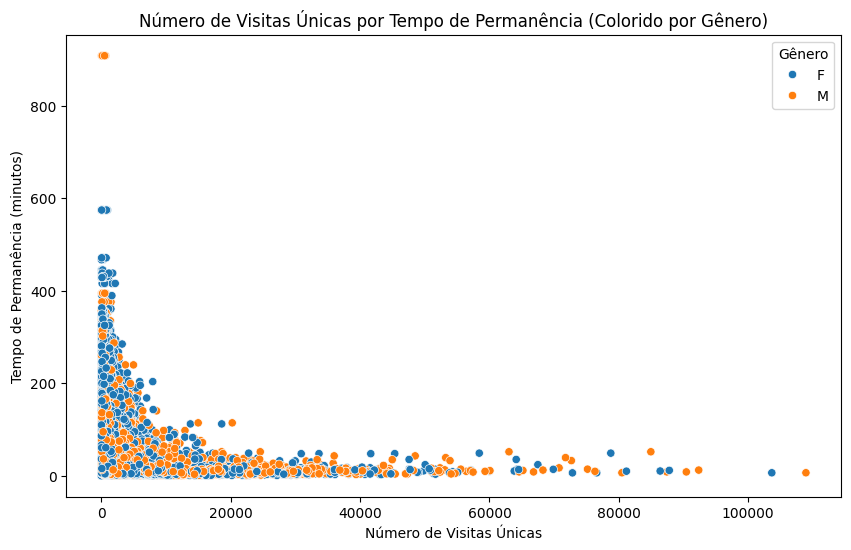

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar o gráfico de dispersão do número de visitas únicas em relação ao tempo de permanência, colorido por gênero
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unique', y='dwell_time_mins', hue='demographics_gender', data=df)
plt.title('Número de Visitas Únicas por Tempo de Permanência (Colorido por Gênero)')
plt.xlabel('Número de Visitas Únicas')
plt.ylabel('Tempo de Permanência (minutos)')
plt.legend(title='Gênero')
plt.show()

###3.1.1 Heatmap Interativo

In [24]:
import folium
from folium.plugins import HeatMap

# Calcular o número total de visitas por setor censitário
df['total_visits'] = df['unique'] + df['new_visitors'] + df['repeat_visitors']

# Agrupar os dados por setor censitário e calcular o número total de visitas
visits_by_sector = df.groupby('store_id')['total_visits'].sum().reset_index()

# Mesclar os dados do DataFrame com os dados geoespaciais do GeoDataFrame
merged_data = gdf.merge(visits_by_sector, left_on='id', right_on='store_id', how='left')

# Criar um mapa centrado em Salvador
mapa = folium.Map(location=[-12.9714, -38.5014], zoom_start=12)

# Adicionar o mapa de calor
heat_data = [[row['geometry'].centroid.y, row['geometry'].centroid.x, row['total_visits']] for _, row in merged_data.iterrows()]
HeatMap(heat_data, radius=15).add_to(mapa)

# Exibir o mapa
mapa

##3.2: Análise exploratória dados Tramontina

Primeiras linhas do DataFrame:
        # Data Emissão Nota Fiscal Código Produto  \
0  370907               02/10/2023       57400094   
1  371918               03/10/2023       57115056   
2  371919               03/10/2023       57217056   
3  371920               03/10/2023       57241013   
4  371921               03/10/2023       58011108   

                     Descrição Produto Qtde Peças Valor Total Produtos  \
0  Adaptador 2p Univer.10a/250v Branco          1            1.642.003   
1          Tomada Rj 45 (Cat 6) Branca         10                94.94   
2            Tomada Rj 45 (Cat 6) Aria         20               177.84   
3  Cj Tomada 2p+T 20a/250v Aria Branco         40               182.74   
4   Minidisjuntor Tdj3-1c32 1p 32a 3ka         24               138.84   

  % Desconto CEP Cliente Nome Cidade UF Cliente Classificação Cliente  
0        0.0    41830390    Salvador         BA         Pessoa Fisica  
1        0.0    41615000    Salvador         BA              

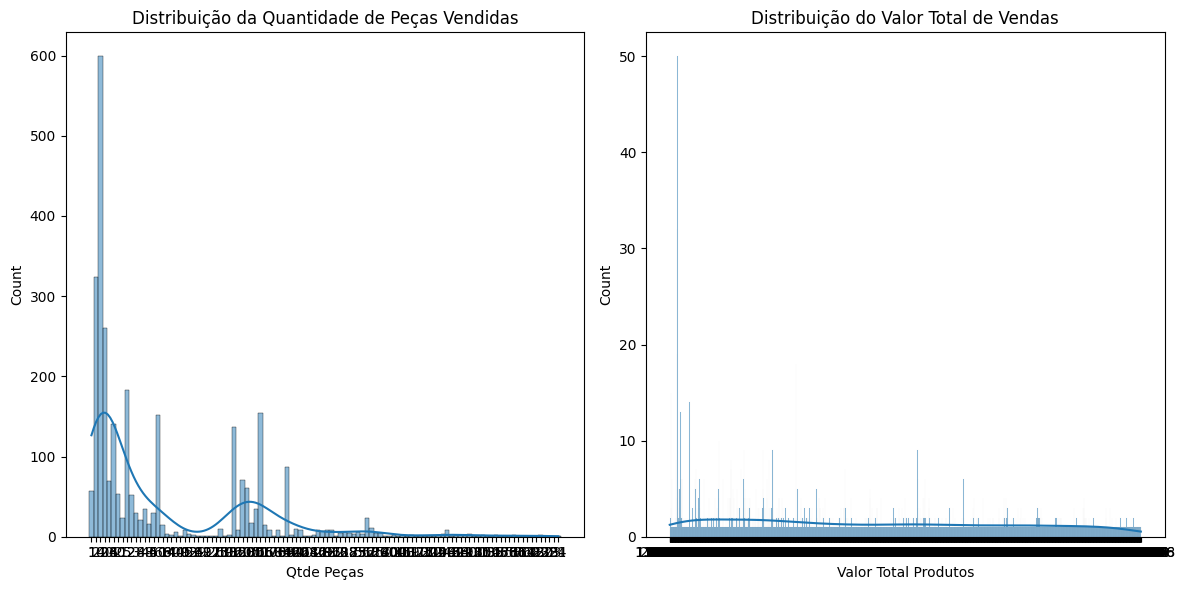

In [25]:
# 1. Visão geral dos dados
print("Primeiras linhas do DataFrame:")
print(tdf.head())

print("\nResumo estatístico dos dados:")
print(tdf.describe())

# 2. Distribuição de vendas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(tdf['Qtde Peças'], bins=20, kde=True)
plt.title('Distribuição da Quantidade de Peças Vendidas')

plt.subplot(1, 2, 2)
sns.histplot(tdf['Valor Total Produtos'], bins=20, kde=True)
plt.title('Distribuição do Valor Total de Vendas')

plt.tight_layout()
plt.show()

<ipython-input-26-53b3b2247a9a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=client_class_counts.index, y=client_class_counts.values, palette='viridis')


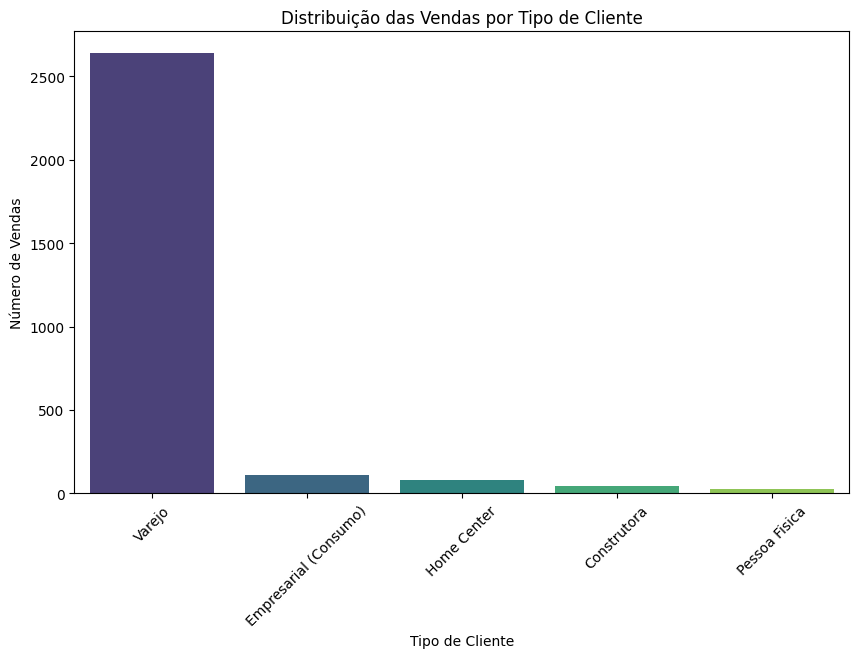

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem das diferentes classificações de clientes
client_class_counts = tdf['Classificação Cliente'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=client_class_counts.index, y=client_class_counts.values, palette='viridis')
plt.title('Distribuição das Vendas por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Verificar os tipos de dados na coluna 'Valor Total Produtos'
print(tdf['Valor Total Produtos'].dtype)

# Visualizar as primeiras linhas dos dados
print(tdf.head())


object
        # Data Emissão Nota Fiscal Código Produto  \
0  370907               02/10/2023       57400094   
1  371918               03/10/2023       57115056   
2  371919               03/10/2023       57217056   
3  371920               03/10/2023       57241013   
4  371921               03/10/2023       58011108   

                     Descrição Produto Qtde Peças Valor Total Produtos  \
0  Adaptador 2p Univer.10a/250v Branco          1            1.642.003   
1          Tomada Rj 45 (Cat 6) Branca         10                94.94   
2            Tomada Rj 45 (Cat 6) Aria         20               177.84   
3  Cj Tomada 2p+T 20a/250v Aria Branco         40               182.74   
4   Minidisjuntor Tdj3-1c32 1p 32a 3ka         24               138.84   

  % Desconto CEP Cliente Nome Cidade UF Cliente Classificação Cliente  
0        0.0    41830390    Salvador         BA         Pessoa Fisica  
1        0.0    41615000    Salvador         BA                Varejo  
2        0.0 

In [28]:
# Remover caracteres não numéricos e converter para tipo float
tdf['Valor Total Produtos'] = tdf['Valor Total Produtos'].str.replace('.', '').str.replace(',', '.').astype(float)

# Verificar novamente os tipos de dados na coluna 'Valor Total Produtos'
print(tdf['Valor Total Produtos'].dtype)

# Verificar as primeiras linhas dos dados
print(tdf.head())

float64
        # Data Emissão Nota Fiscal Código Produto  \
0  370907               02/10/2023       57400094   
1  371918               03/10/2023       57115056   
2  371919               03/10/2023       57217056   
3  371920               03/10/2023       57241013   
4  371921               03/10/2023       58011108   

                     Descrição Produto Qtde Peças  Valor Total Produtos  \
0  Adaptador 2p Univer.10a/250v Branco          1             1642003.0   
1          Tomada Rj 45 (Cat 6) Branca         10                9494.0   
2            Tomada Rj 45 (Cat 6) Aria         20               17784.0   
3  Cj Tomada 2p+T 20a/250v Aria Branco         40               18274.0   
4   Minidisjuntor Tdj3-1c32 1p 32a 3ka         24               13884.0   

  % Desconto CEP Cliente Nome Cidade UF Cliente Classificação Cliente  
0        0.0    41830390    Salvador         BA         Pessoa Fisica  
1        0.0    41615000    Salvador         BA                Varejo  
2     

<ipython-input-28-4e946bfa3e47>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tdf['Valor Total Produtos'] = tdf['Valor Total Produtos'].str.replace('.', '').str.replace(',', '.').astype(float)


In [29]:
# Exibir informações sobre a coluna 'Data Emissão Nota Fiscal'
print(tdf['Data Emissão Nota Fiscal'])

0       02/10/2023
1       03/10/2023
2       03/10/2023
3       03/10/2023
4       03/10/2023
           ...    
2889    31/10/2023
2890    31/10/2023
2891    31/10/2023
2892    31/10/2023
2893    31/10/2023
Name: Data Emissão Nota Fiscal, Length: 2894, dtype: object


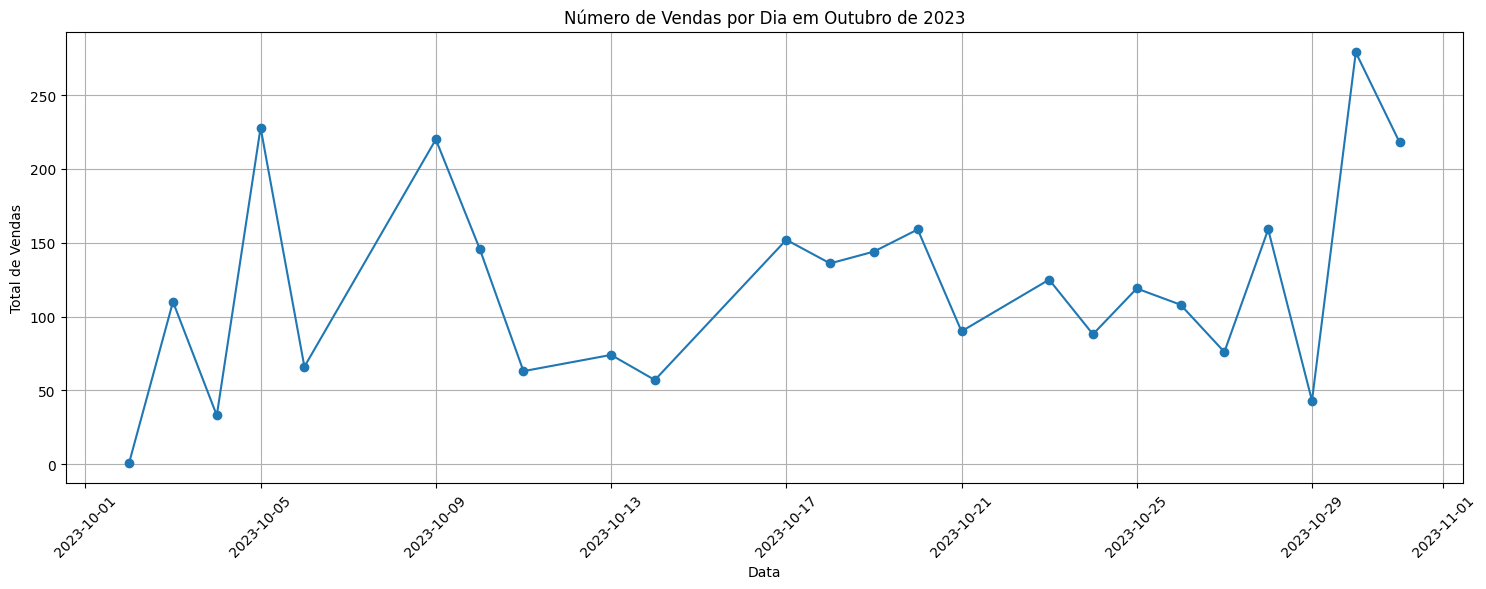

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertendo a coluna de datas para o tipo datetime (caso não tenha sido feito ainda)
tdf['Data Emissão Nota Fiscal'] = pd.to_datetime(tdf['Data Emissão Nota Fiscal'], dayfirst=True)

# Criando um DataFrame com todos os dias do mês de outubro de 2023
all_days = pd.date_range(start='2023-10-01', end='2023-10-31', freq='D')

# Contando o número de vendas em cada dia
sales_by_day = tdf['Data Emissão Nota Fiscal'].dt.date.value_counts().sort_index()

# Plotando a análise temporal detalhada do número de vendas por dia em outubro
plt.figure(figsize=(15, 6))
plt.plot(sales_by_day.index, sales_by_day.values, marker='o', linestyle='-')
plt.title('Número de Vendas por Dia em Outubro de 2023')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Filtrar as vendas que ocorreram no mês de outubro
vendas_outubro = tdf[tdf['Data Emissão Nota Fiscal'].dt.month == 10]

# Listar os produtos vendidos no mês de outubro
produtos_vendidos_outubro = vendas_outubro['Descrição Produto'].unique()

# Exibir a lista de produtos vendidos
print("Produtos vendidos no mês de outubro:")
for produto in produtos_vendidos_outubro:
    print(produto)


Produtos vendidos no mês de outubro:
Adaptador 2p Univer.10a/250v Branco
Tomada Rj 45 (Cat 6) Branca
Tomada Rj 45 (Cat 6) Aria
Cj Tomada 2p+T 20a/250v Aria Branco
Minidisjuntor Tdj3-1c32 1p 32a 3ka
Minidisjuntor Tdj3-1c40 1p 40a 3ka
Barramento Din-Pino 1 Fase 12 Polos
Barramento Din-Pino 2fases 12 Polos
Tampa 4x4 Redonda Teto Lux Branca
Tampa 3x3 Redonda Teto Lux Branca
Inter.Simples Baixo Branco 10a/250v
Tomada 2p+T 20a/250v Baixa
Placa Cega 4x2 Tablet Branca
Placa 1p Horiz. 4x2 Tablet Branca
Placa Cega 4x4 Tablet Branca
Cj 1 Interruptor Simples 10a/250v
Cj 1 Interruptor Paralelo 10a/250v
Cj 1 Pulsador Campainha Tablet Br
Cj 1 Tomada 2p+T 10a/250v Tablet Br
Cj 1 Tomada 2p+T 20a/250v Tablet Br
Cj. 2 Interruptor Simples 10a/250v
Cj 1inter.Simples+1tomada 2p+T 20a
Cj 1inter.Simp.+1tom. 2p+T 10a250v
Cj 2 Tomadas 2p+T 10a/250v Tablet
Cj 2 Tomadas 2p+T 20a/250v Tablet
Cj 3 Interruptor Simples 10a/250v
Caixa Multipla X Cinza Escuro
Canaleta 20x10x2000 C/Divis. C/Fita
Plugue Macho 2p 10a/250v

In [32]:
# Contar o número de vendas de cada produto
vendas_por_produto = tdf['Descrição Produto'].value_counts()

# Encontrar os 10 produtos mais vendidos
top_10_produtos = vendas_por_produto.head(10)

# Exibir os 10 produtos mais vendidos
print("Top 10 produtos mais vendidos:")
print(top_10_produtos)

Top 10 produtos mais vendidos:
Cj Tomada 2p+T 20a/250v Aria Branco    82
Cj 2 Tomadas 2p+T 20a/250v Aria Bra    78
Cj 2 Tomadas 2p+T 10a/250v Aria Bra    75
Cj Tomada 2p+T 10a/250v Aria Branco    67
Minidisjuntor Tdj3-1c40 1p 40a 3ka     62
Placa Cega 4x2 Aria Branca             61
Cj Int.Simples 6a+Tom.2p+T 10a Aria    60
Cj Inter.Simples 6a/250v Aria Branc    58
Cj. 2 Inter.Simples 6a/250v Aria       49
Cj 3 Inter. Simples 6a/250v Aria       45
Name: Descrição Produto, dtype: int64


In [33]:
# Contar o número de vendas de cada produto
vendas_por_produto = tdf['Descrição Produto'].value_counts()

# Encontrar os 10 produtos menos vendidos
bottom_10_produtos = vendas_por_produto.tail(10)

# Exibir os 10 produtos menos vendidos
print("Top 10 produtos menos vendidos:")
print(bottom_10_produtos)

Top 10 produtos menos vendidos:
Cx Moldada Tdm-125s 3100 3p 100a 36    1
Caixa de Piso 4x4 Baixa 3/4            1
Lampada Led Tipo Bulbo 15w 6500k       1
Lampada Led Alta Potencia 20w 6500k    1
Cj Variador Ventilador Bivolt Aria     1
Cj 1 Tomada 2p+T 20a/250v Vermelha     1
Caixa de Piso 4x2 Baixa 3/4            1
Luva de Emenda Sem Rosca 3/4           1
Int. Bipolar Simples 10a/250v Aria     1
Botao Seletor Trp2-Ej33-2na 3 Pos.     1
Name: Descrição Produto, dtype: int64


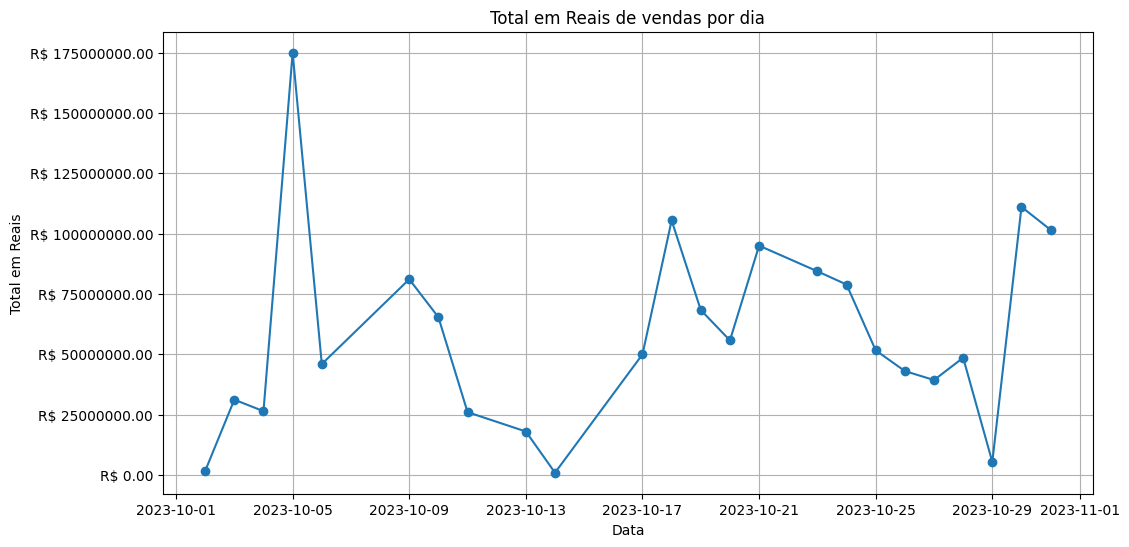

In [34]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Converter a coluna 'Data Emissão Nota Fiscal' para o formato de data (caso ainda não esteja)
tdf['Data Emissão Nota Fiscal'] = pd.to_datetime(tdf['Data Emissão Nota Fiscal'], dayfirst=True)

# Agrupar as vendas por dia e somar o valor total de produtos vendidos em cada dia
vendas_por_dia = tdf.groupby(tdf['Data Emissão Nota Fiscal'].dt.date)['Valor Total Produtos'].sum()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
ax = vendas_por_dia.plot(marker='o', linestyle='-')
plt.title('Total em Reais de vendas por dia')
plt.xlabel('Data')
plt.ylabel('Total em Reais')

# Formatando o eixo y para exibir os valores em Reais
formatter = ticker.FuncFormatter(lambda x, pos: 'R$ {:.2f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

plt.grid(True)
plt.show()

#PASSO 4: Modelos Espaciais

##4.1 Análise GeoEspacial

In [35]:
!pip install folium
!pip install geopandas

In [36]:
import pandas as pd
import geopandas as gpd

# Merge entre 'df' e 'gdf' usando a coluna 'store_id' do 'df' e 'id' do 'gdf'
merged_df = pd.merge(df, gdf, left_on='store_id', right_on='id', how='left')

# Exibir o dataframe 'merged_df' com as colunas de interesse
print(merged_df[['store_id', 'id', 'geometry']])

        store_id        id                     geometry
0       kml_2244  kml_2244  POINT (-38.44299 -12.92125)
1       kml_4311  kml_4311  POINT (-38.52722 -13.00204)
2        kml_236   kml_236  POINT (-38.43570 -12.97422)
3        kml_143   kml_143  POINT (-38.44378 -12.97931)
4         kml_33    kml_33  POINT (-38.47859 -13.00550)
...          ...       ...                          ...
364155  kml_1335  kml_1335  POINT (-38.46472 -12.85390)
364156  kml_1335  kml_1335  POINT (-38.46472 -12.85390)
364157  kml_2508  kml_2508  POINT (-38.48594 -12.89118)
364158  kml_2508  kml_2508  POINT (-38.48594 -12.89118)
364159  kml_4221  kml_4221  POINT (-38.51310 -13.00304)

[364160 rows x 3 columns]


In [37]:
# Adicionar o hífen após o quinto número em cada entrada da coluna 'CEP Cliente'
tdf['CEP Cliente'] = tdf['CEP Cliente'].str.slice(0, 5) + '-' + tdf['CEP Cliente'].str.slice(5)

# Exibir as primeiras linhas do dataframe para verificar as alterações
print(tdf.head())

        # Data Emissão Nota Fiscal Código Produto  \
0  370907               2023-10-02       57400094   
1  371918               2023-10-03       57115056   
2  371919               2023-10-03       57217056   
3  371920               2023-10-03       57241013   
4  371921               2023-10-03       58011108   

                     Descrição Produto Qtde Peças  Valor Total Produtos  \
0  Adaptador 2p Univer.10a/250v Branco          1             1642003.0   
1          Tomada Rj 45 (Cat 6) Branca         10                9494.0   
2            Tomada Rj 45 (Cat 6) Aria         20               17784.0   
3  Cj Tomada 2p+T 20a/250v Aria Branco         40               18274.0   
4   Minidisjuntor Tdj3-1c32 1p 32a 3ka         24               13884.0   

  % Desconto CEP Cliente Nome Cidade UF Cliente Classificação Cliente  
0        0.0   41830-390    Salvador         BA         Pessoa Fisica  
1        0.0   41615-000    Salvador         BA                Varejo  
2        0.0  

In [38]:
from geopy.exc import GeocoderTimedOut

# Função para obter as coordenadas a partir do CEP
def get_coordinates(cep):
    try:
        location = geolocator.geocode(cep)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        print(f"Tempo limite excedido ao obter coordenadas para o CEP {cep}")
        return None, None
    except Exception as e:
        print(f"Erro ao obter coordenadas para o CEP {cep}: {e}")
        return None, None

In [64]:
import pandas as pd
from geopy.geocoders import Bing

# Função para obter as coordenadas (latitude e longitude) de um CEP
def get_coordinates_from_cep(cep, api_key):
    geolocator = Bing(api_key=api_key)
    location = geolocator.geocode(cep)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Sua chave da Bing Maps API
BING_MAPS_API_KEY = 'Am9tZD0DEooaWuevTMwLPDNowlXtq9blNXGLLNrXgPZXC_D4DyVqZ_pD1qy2e68S'

# DataFrame com os CEPs
# Vou assumir que você tem um DataFrame chamado 'tdf' com uma coluna chamada 'CEP Cliente'
# Substitua 'tdf' pelo nome real do seu DataFrame
# Exemplo:
# tdf = pd.read_csv('seu_arquivo.csv')

# Adicione duas novas colunas para as coordenadas
tdf['Latitude'] = None
tdf['Longitude'] = None

# Iterar sobre as linhas do DataFrame e obter as coordenadas para cada CEP
for index, row in tdf.iterrows():
    cep = row['CEP Cliente']
    latitude, longitude = get_coordinates_from_cep(cep, BING_MAPS_API_KEY)
    tdf.at[index, 'Latitude'] = latitude
    tdf.at[index, 'Longitude'] = longitude

# Exibir o DataFrame atualizado
print(tdf)

           # Data Emissão Nota Fiscal Código Produto  \
0     370907               2023-10-02       57400094   
1     371918               2023-10-03       57115056   
2     371919               2023-10-03       57217056   
3     371920               2023-10-03       57241013   
4     371921               2023-10-03       58011108   
...      ...                      ...            ...   
2889  480277               2023-10-31       58012102   
2890  497110               2023-10-31       58015318   
2891  497111               2023-10-31       58015319   
2892  497112               2023-10-31       58015321   
2893  497113               2023-10-31       58015833   

                        Descrição Produto Qtde Peças  Valor Total Produtos  \
0     Adaptador 2p Univer.10a/250v Branco          1             1642003.0   
1             Tomada Rj 45 (Cat 6) Branca         10                9494.0   
2               Tomada Rj 45 (Cat 6) Aria         20               17784.0   
3     Cj Tomada

In [66]:
from google.colab import files

# Salvando o DataFrame em um arquivo CSV
tdf.to_csv('tdf_com_coordenadas.csv', index=False)

# Fazendo o download do arquivo CSV
files.download('tdf_com_coordenadas.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##4.2Heatmap com dados de mobilidade (visitas) e localização dos Clientes

In [69]:
import folium
from folium.plugins import HeatMap

# Calcular o número total de visitas por setor censitário
df['total_visits'] = df['unique'] + df['new_visitors'] + df['repeat_visitors']

# Agrupar os dados por setor censitário e calcular o número total de visitas
visits_by_sector = df.groupby('store_id')['total_visits'].sum().reset_index()

# Mesclar os dados do DataFrame com os dados geoespaciais do GeoDataFrame
merged_data = gdf.merge(visits_by_sector, left_on='id', right_on='store_id', how='left')

# Criar um mapa centrado em Salvador
mapa = folium.Map(location=[-12.9714, -38.5014], zoom_start=12)

# Adicionar o mapa de calor
heat_data = [[row['geometry'].centroid.y, row['geometry'].centroid.x, row['total_visits']] for _, row in merged_data.iterrows()]
HeatMap(heat_data, radius=15).add_to(mapa)

# Adicionar as localizações dos CEPs dos clientes, lidando com valores ausentes
for index, row in tdf.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['CEP Cliente']).add_to(mapa)

# Exibir o mapa
mapa

In [70]:
import folium
from folium.plugins import HeatMap

# Calcular o número total de visitas por setor censitário
df['total_visits'] = df['unique'] + df['new_visitors'] + df['repeat_visitors']

# Agrupar os dados por setor censitário e calcular o número total de visitas
visits_by_sector = df.groupby('store_id')['total_visits'].sum().reset_index()

# Mesclar os dados do DataFrame com os dados geoespaciais do GeoDataFrame
merged_data = gdf.merge(visits_by_sector, left_on='id', right_on='store_id', how='left')

# Criar um mapa centrado em Salvador
mapa = folium.Map(location=[-12.9714, -38.5014], zoom_start=12)

# Adicionar o mapa de calor
heat_data = [[row['geometry'].centroid.y, row['geometry'].centroid.x, row['total_visits']] for _, row in merged_data.iterrows()]
HeatMap(heat_data, radius=15).add_to(mapa)

# Adicionar as localizações dos CEPs dos clientes, lidando com valores ausentes
for index, row in tdf.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['CEP Cliente']).add_to(mapa)

# Adicionar marcador em destaque - Tramontina TStore Salvador/BA
folium.Marker(location=[-12.977754, -38.454056], popup='Destaque', icon=folium.Icon(color='black')).add_to(mapa)

# Exibir o mapa
mapa

##4.3 Correlações Espaciais

adicionar correlações entre a mobilidade, CEPs e PDV Tramontina.